In [ ]:
#James Godkin

In [141]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from patsy import dmatrix
from numpy.linalg import inv
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [7]:
health_data = pd.read_csv("Health_Data.csv")
print(health_data)

scaler = StandardScaler()
health_data[['age', 'income', 'illness', 'reduced']] = scaler.fit_transform(health_data[['age', 'income', 'illness', 'reduced']])
print(health_data)

       age  income  illness  reduced  health
0     0.19    0.55        1        4       1
1     0.19    0.45        1        2       1
2     0.19    0.90        3        0       0
3     0.19    0.15        1        0       0
4     0.19    0.45        2        5       1
...    ...     ...      ...      ...     ...
5185  0.22    0.55        0        0       0
5186  0.27    1.30        0        0       1
5187  0.37    0.25        1        0       1
5188  0.52    0.65        0        0       0
5189  0.72    0.25        0        0       0

[5190 rows x 5 columns]
           age    income   illness   reduced  health
0    -1.056765 -0.089896 -0.312123  1.086862       1
1    -1.056765 -0.360993 -0.312123  0.394185       1
2    -1.056765  0.858945  1.132944 -0.298492       0
3    -1.056765 -1.174285 -0.312123 -0.298492       0
4    -1.056765 -0.360993  0.410410  1.433200       1
...        ...       ...       ...       ...     ...
5185 -0.910253 -0.089896 -1.034657 -0.298492       0
5186 -0.666

In [41]:
b = []
for i in range(len(health_data.columns)+1):
    b.append(0)

numOfFeat = len(health_data.columns)-1
    
a = 0.01
iterations = 1000

x = []
for i in health_data:
    x.append(np.array(health_data[i]))
y = x[-1]
x.pop()
n = len(y)

for i in range(iterations):
    predicted_y = b[0]
    for j in range(1, numOfFeat+1):
        predicted_y += b[j]*x[j-1]
    errors = y - predicted_y
    b[0] = b[0]+a*(1/n)*sum(errors)
    for j in range(1, numOfFeat+1):
        b[j] = b[j]+a*(1/n)*sum(errors*x[j-1])
for i in range(numOfFeat+1):
    print(f'b{i}:', b[i])

b0: 1.2174811562403878
b1: -0.17253212081475539
b2: -0.10527913575641314
b3: 0.6847604319993603
b4: 0.4572023400379415


In [72]:
X = dmatrix('age + income + illness + reduced', health_data)[:]
b = np.array([0,0,0,0,0]).reshape(1,5)
a = 0.01
y = np.array(health_data['health'])
n = len(y)
iterations = 1000
for i in range(iterations):
    y_pred = np.matmul(b, X.T)
    errors = y - y_pred
    b = b+a*(1/n)*sum(errors.T*X)
for i in range(b.size):
    print(f'b{i}:', b[0][i])

b0: 1.2174811562403878
b1: -0.17253212081475544
b2: -0.10527913575641314
b3: 0.6847604319993604
b4: 0.4572023400379415


In [78]:
sgd = SGDRegressor()
sgd.fit(X, y)
sgd.coef_

array([ 0.62034131, -0.18424581, -0.11522744,  0.69760672,  0.46572601])

In [81]:
feature_matrix = sm.add_constant(health_data[['age', 'income', 'illness', 'reduced']], prepend=False)
# Fit and summarize OLS model
model = sm.OLS(health_data['health'], feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Thu, 27 May 2021   Prob (F-statistic):          2.35e-220
Time:                        15:46:30   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1727      0.028     -6.120      0.0

0      -0.692625
1      -0.404543
2      -1.949059
3      -1.173603
4      -1.374393
          ...   
5185   -0.539141
5186    0.717322
5187    0.006814
5188   -0.257493
5189   -0.203060
Length: 5190, dtype: float64


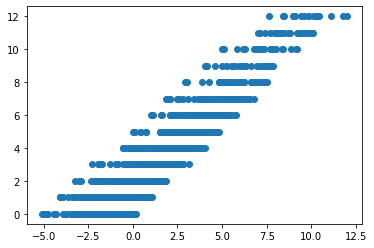

In [87]:
residuals = res.resid
print(residuals)
plt.scatter(residuals, y)
plt.show()

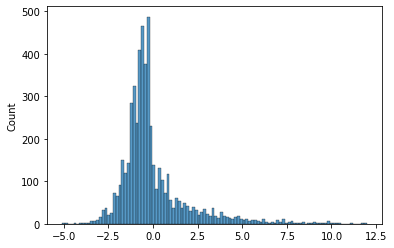

In [97]:
sns.histplot(residuals)
plt.show()

<AxesSubplot:>

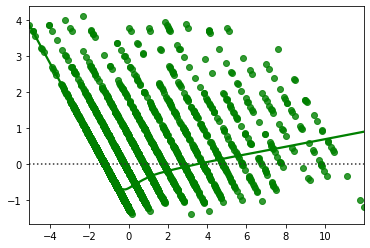

In [90]:
sns.residplot(x=residuals, y=y, lowess=True, color="g")

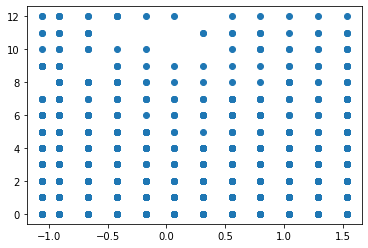

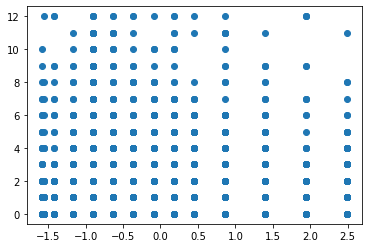

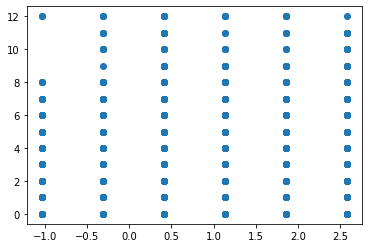

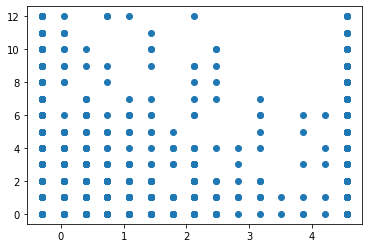

In [95]:
for i in ['age', 'income', 'illness', 'reduced']:
    plt.scatter(health_data[i], health_data['health'])
    plt.show()
# for i in ['age', 'income', 'illness', 'reduced']:
#     plt.hist(health_data[i])
#     plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

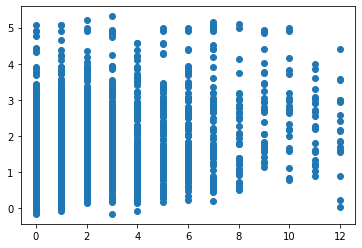

In [104]:
y_pred = res.predict()
plt.scatter(health_data['health'], y_pred)
plt.show

In [107]:
health_data.cov()

,age,income,illness,reduced,health
age,1.000193,-0.271126,0.205023,0.094763,0.039549
income,-0.271126,1.000193,-0.148840,-0.047554,-0.182259
illness,0.205023,-0.148840,1.000193,0.218158,0.765043
reduced,0.094763,-0.047554,0.218158,1.000193,0.595294
health,0.039549,-0.182259,0.765043,0.595294,4.512508


In [115]:
fish_df = pd.read_csv("Fish.csv")
print(fish_df)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


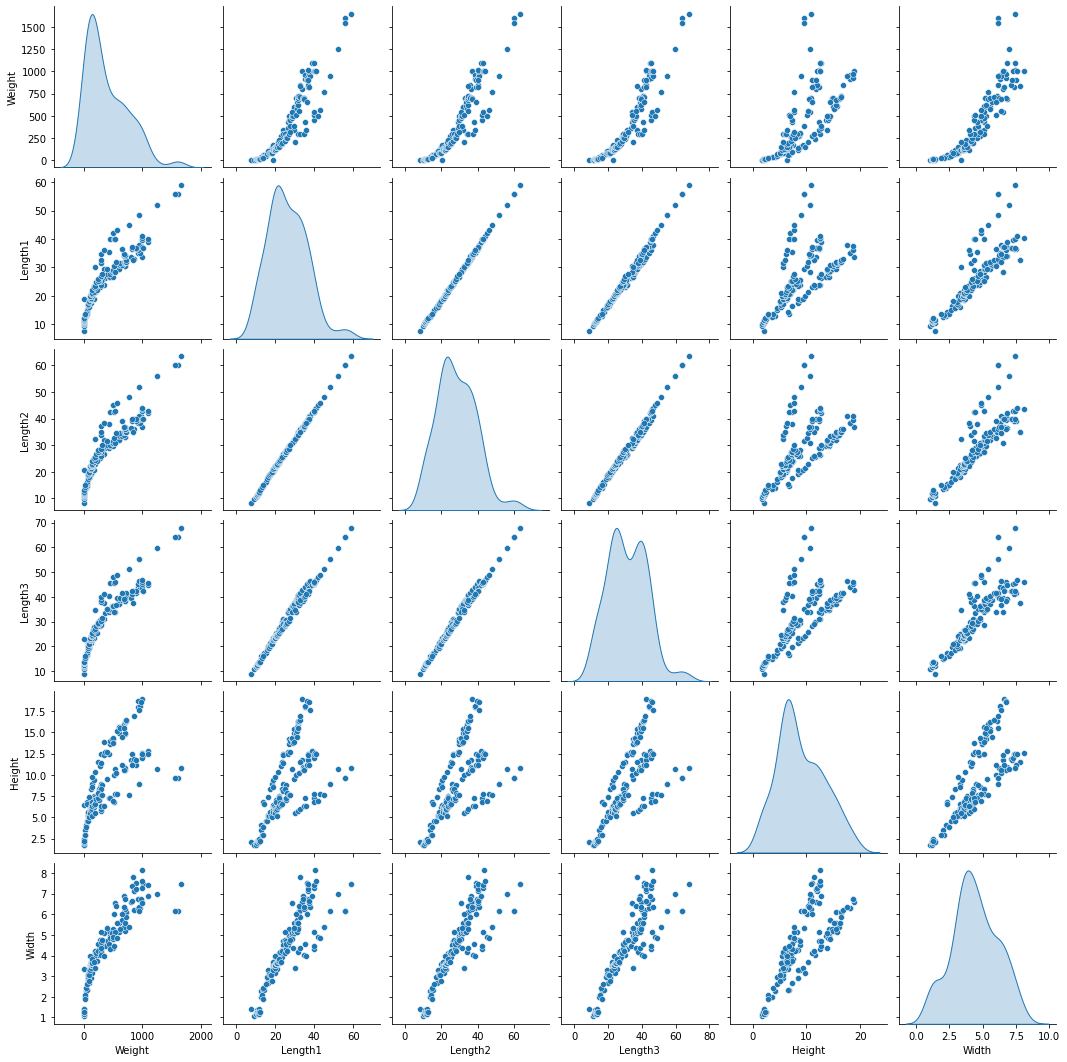

In [110]:
sns.pairplot(fish_df[["Weight", "Length1", "Length2", "Length3", "Height", "Width"]], diag_kind ="kde")

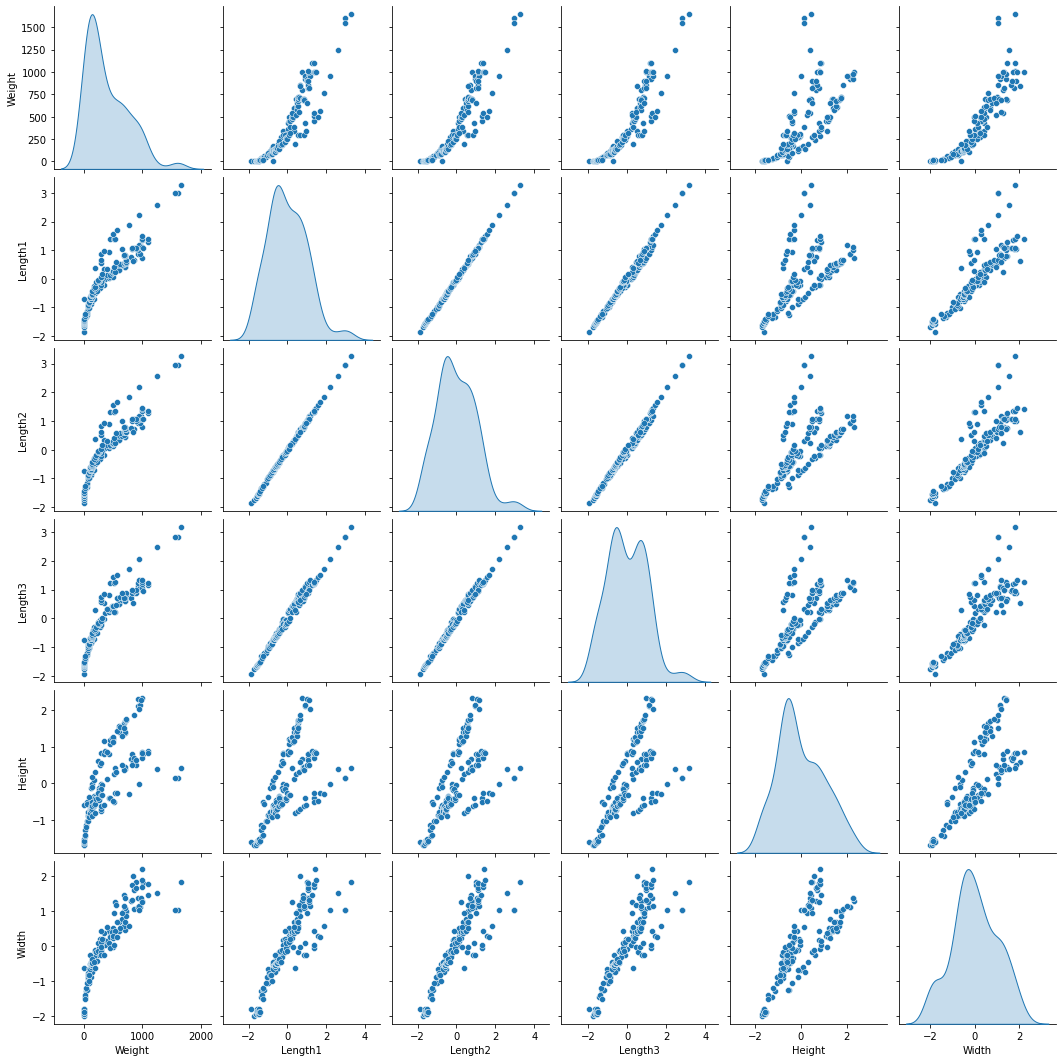

In [118]:
fish_df = fish_df[["Weight", "Length1", "Length2", "Length3", "Height", "Width"]]
scaler = StandardScaler()
fish_df[["Length1", "Length2", "Length3", "Height", "Width"]] = scaler.fit_transform(fish_df[["Length1", "Length2", "Length3", "Height", "Width"]])
sns.pairplot(fish_df[["Weight", "Length1", "Length2", "Length3", "Height", "Width"]], diag_kind ="kde")
fish_y = fish_df['Weight']
fish_x = fish_df[["Length1", "Length2", "Length3", "Height", "Width"]]

In [122]:
fish_X_train, fish_X_test, fish_y_train, fish_y_test = train_test_split(fish_x, fish_y, test_size=0.3,random_state=52637)
print('X_train:')
print(fish_X_train.head(5))
print('y_train:')
print(fish_y_train.head(5))
print('X_test:')
print(fish_X_test.head(5))
print('y_test:')
print(fish_y_test.head(5))

X_train:
      Length1   Length2   Length3    Height     Width
128  0.376603  0.363609  0.308714 -0.796449 -0.619988
76  -1.058426 -1.031186 -1.099654 -1.025812 -0.878304
84  -0.727266 -0.694189 -0.754042 -0.767311 -0.446289
137  1.580823  1.552460  1.449233 -0.470660  0.284746
105 -0.085015 -0.085721 -0.201063 -0.395111  0.088494
y_train:
128    200.0
76      70.0
84     125.0
137    500.0
105    250.0
Name: Weight, dtype: float64
X_test:
      Length1   Length2   Length3    Height     Width
126  1.400190  1.412045  1.276427  0.850282  2.216321
45  -0.576738 -0.553773 -0.512114 -0.453481 -0.355363
37  -0.877793 -0.900132 -0.866366 -0.794670 -0.900381
149 -1.560184 -1.611570 -1.626712 -1.612044 -1.868668
10   0.216040  0.241915  0.429678  1.238514  0.408638
y_test:
126    1000.0
45      160.0
37       78.0
149       9.8
10      475.0
Name: Weight, dtype: float64


In [134]:
print("LinearRegression")
linReg = LinearRegression()
linReg.fit(fish_X_train, fish_y_train)
fish_y_pred = linReg.predict(fish_X_train)
print("Root Mean Squared Error Train:",np.sqrt(mean_squared_error(fish_y_train, fish_y_pred)))
fish_y_pred = linReg.predict(fish_X_test)
print("Root Mean Squared Error Test:",np.sqrt(mean_squared_error(fish_y_test, fish_y_pred)))

LinearRegression
Root Mean Squared Error Train: 122.99503671802648
Root Mean Squared Error Test: 116.92299188592442


In [138]:
print("LassoRegression")
lasReg = linear_model.Lasso()
lasReg.fit(fish_X_train, fish_y_train)
fish_y_pred = lasReg.predict(fish_X_train)
print("Root Mean Squared Error Train:",np.sqrt(mean_squared_error(fish_y_train, fish_y_pred)))
fish_y_pred = lasReg.predict(fish_X_test)
print("Root Mean Squared Error Test:",np.sqrt(mean_squared_error(fish_y_test, fish_y_pred)))

LassoRegression
Root Mean Squared Error Train: 124.98140588546028
Root Mean Squared Error Test: 116.28153754638554


In [140]:
print("RidgeRegression")
ridReg = Ridge()
ridReg.fit(fish_X_train, fish_y_train)
fish_y_pred = ridReg.predict(fish_X_train)
print("Root Mean Squared Error Train:",np.sqrt(mean_squared_error(fish_y_train, fish_y_pred)))
fish_y_pred = ridReg.predict(fish_X_test)
print("Root Mean Squared Error Test:",np.sqrt(mean_squared_error(fish_y_test, fish_y_pred)))

RidgeRegression
Root Mean Squared Error Train: 125.26736654959983
Root Mean Squared Error Test: 116.24019634489582


In [162]:
param_grid = [{"alpha":range(0,100)}]
grid = GridSearchCV(estimator=linear_model.Lasso(), param_grid=param_grid, n_jobs=-1, cv=5)
grid.fit(fish_X_train,fish_y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1, param_grid=[{'alpha': range(0, 100)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [163]:
print('Best Params:')
print(grid.best_params_)
print('Best Estimator:')
print(grid.best_estimator_)

Best Params:
{'alpha': 1}
Best Estimator:
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [164]:
fish_y_pred = grid.best_estimator_.predict(fish_X_test)
fish_y_pred = ridReg.predict(fish_X_test)
print("Root Mean Squared Error Test:",np.sqrt(mean_squared_error(fish_y_test, fish_y_pred)))

Root Mean Squared Error Test: 116.24019634489582


In [159]:
param_grid = [{"alpha":range(0,100)}]
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, n_jobs=-1, cv=5)
grid.fit(fish_X_train,fish_y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1, param_grid=[{'alpha': range(0, 100)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [160]:
print('Best Params:')
print(grid.best_params_)
print('Best Estimator:')
print(grid.best_estimator_)

Best Params:
{'alpha': 15}
Best Estimator:
Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [161]:
fish_y_pred = grid.best_estimator_.predict(fish_X_test)
fish_y_pred = ridReg.predict(fish_X_test)
print("Root Mean Squared Error Test:",np.sqrt(mean_squared_error(fish_y_test, fish_y_pred)))

Root Mean Squared Error Test: 116.24019634489582
